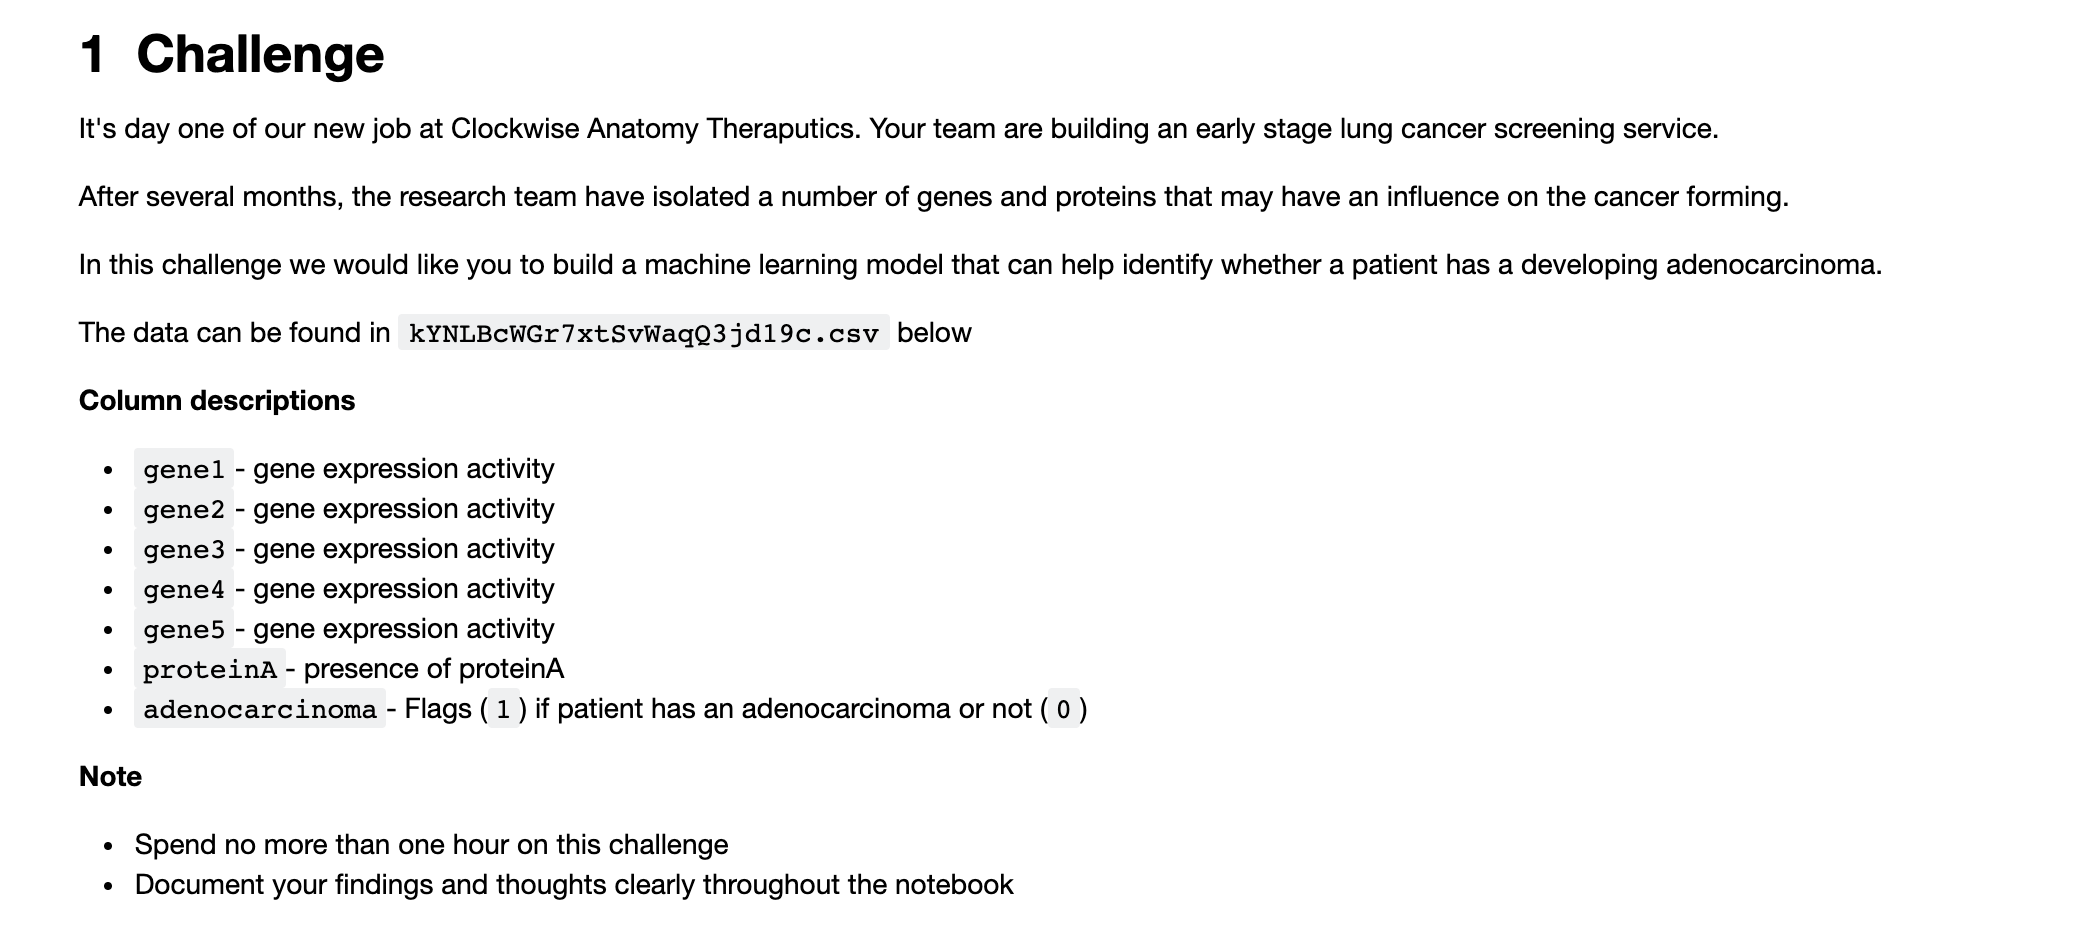

# Import & Inspect Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_challenge_lw.csv')

In [3]:
df.head()

,gene1,gene2,gene3,gene4,gene5,proteinA,adenocarcinoma
0,-4.253070,1060.828274,0.723866,-183.193766,899.840296,absent,0
1,-9.394422,745.845012,1.177609,-348.189944,-320.521019,absent,1
2,-12.529502,1210.943422,0.362242,447.704411,643.489025,present,0
3,-8.676414,1339.463332,0.937266,397.341232,837.099109,absent,1
4,-2.462555,-148.879229,1.509619,404.786878,-1356.039919,present,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gene1           1000 non-null   float64
 1   gene2           823 non-null    float64
 2   gene3           1000 non-null   float64
 3   gene4           1000 non-null   float64
 4   gene5           1000 non-null   float64
 5   proteinA        1000 non-null   object 
 6   adenocarcinoma  1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [5]:
df.describe()

,gene1,gene2,gene3,gene4,gene5,adenocarcinoma
count,1000.000000,823.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-8.112072,708.211386,0.317416,-7.166368,-3839.904311,0.656000
std,4.351616,2571.315200,1.039008,293.807575,15541.914467,0.475279
min,-23.671164,-19800.000000,-3.071460,-966.237108,-64915.706924,0.000000
25%,-11.025179,617.886568,-0.353048,-211.258806,-107.682102,0.000000
50%,-8.151486,1031.380129,0.448941,-13.451477,670.529784,1.000000
75%,-5.053541,1457.951449,1.057965,205.591666,1418.368094,1.000000
max,7.285305,2984.791433,2.842670,788.249519,3826.953668,1.000000


In [6]:
df.dtypes

gene1             float64
gene2             float64
gene3             float64
gene4             float64
gene5             float64
proteinA           object
adenocarcinoma      int64
dtype: object

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

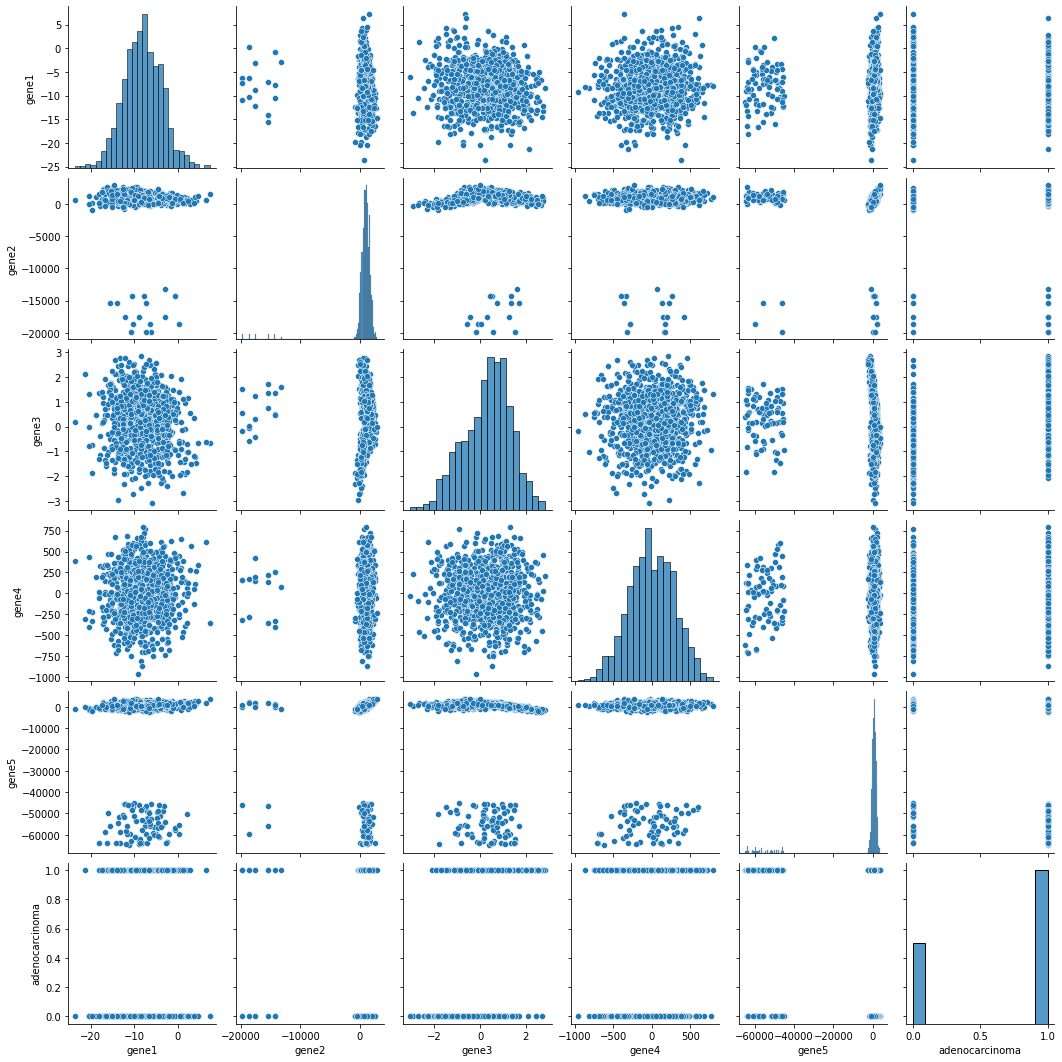

In [8]:
sns.pairplot(df)

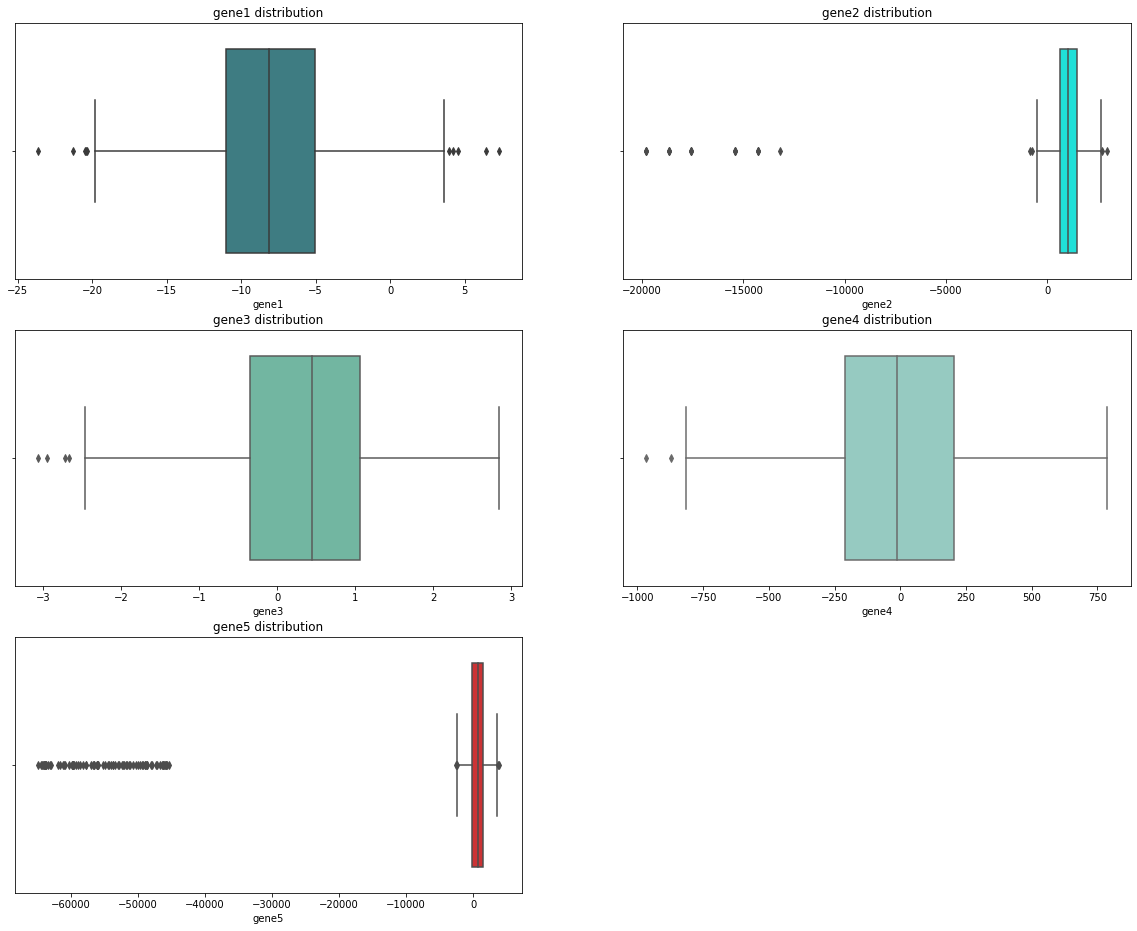

In [9]:
# boxplots
fig, axs = plt.subplots(3, 2, figsize=(20,16))

sns.boxplot(data=df, x='gene1', palette='crest', ax=axs[0,0]).set_title('gene1 distribution')
sns.boxplot(data=df, x='gene2', palette='hsv', ax=axs[0,1]).set_title('gene2 distribution')
sns.boxplot(data=df, x='gene3', palette='Set2', ax=axs[1,0]).set_title('gene3 distribution')
sns.boxplot(data=df, x='gene4', palette='Set3', ax=axs[1,1]).set_title('gene4 distribution')
sns.boxplot(data=df, x='gene5', palette='Set1', ax=axs[2,0]).set_title('gene5 distribution')
fig.delaxes(axs[2,1])

<AxesSubplot:>

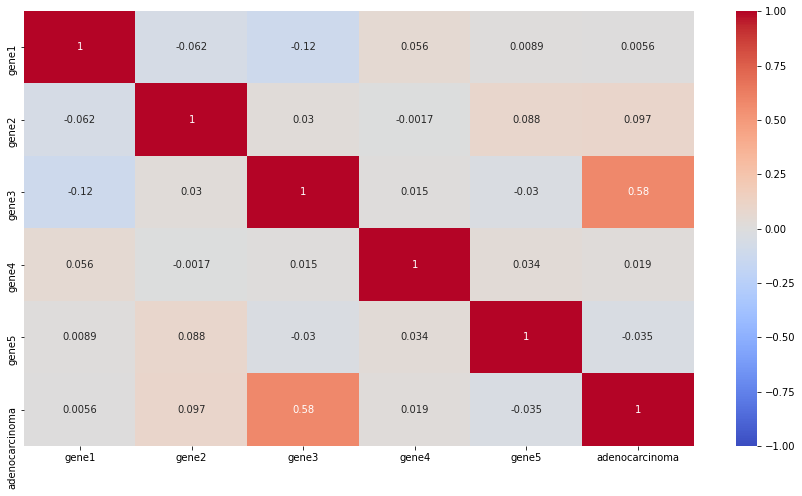

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, annot=True, fmt='.2g', cmap='coolwarm')

# Data Preprocessing

## remove outliers

In [11]:
# drop outliers
df_new = df[(df['gene2']>-10000) & (df['gene5']>-40000)]
df_new.reset_index(drop=True, inplace=True)

In [12]:
df_new

,gene1,gene2,gene3,gene4,gene5,proteinA,adenocarcinoma
0,-4.253070,1060.828274,0.723866,-183.193766,899.840296,absent,0
1,-9.394422,745.845012,1.177609,-348.189944,-320.521019,absent,1
2,-12.529502,1210.943422,0.362242,447.704411,643.489025,present,0
3,-8.676414,1339.463332,0.937266,397.341232,837.099109,absent,1
4,-2.462555,-148.879229,1.509619,404.786878,-1356.039919,present,1
...,...,...,...,...,...,...,...
741,2.298619,489.098637,-1.025170,8.790124,1596.877777,present,0
742,-4.292672,1213.320331,0.341498,-174.089397,1370.105738,present,0
743,-13.993540,1610.337033,0.771957,-10.378714,911.864537,absent,1
744,-8.367396,369.497263,-0.759674,56.265427,326.115137,present,0


In [13]:
df_new.isnull().sum()

gene1             0
gene2             0
gene3             0
gene4             0
gene5             0
proteinA          0
adenocarcinoma    0
dtype: int64

## set features and targets

In [14]:
# set target
y = df_new['adenocarcinoma']
y.value_counts()

1    485
0    261
Name: adenocarcinoma, dtype: int64

In [15]:
# select relevant features
features = ['gene2', 'gene3', 'gene5', 'proteinA']
X = df_new[features]
X

,gene2,gene3,gene5,proteinA
0,1060.828274,0.723866,899.840296,absent
1,745.845012,1.177609,-320.521019,absent
2,1210.943422,0.362242,643.489025,present
3,1339.463332,0.937266,837.099109,absent
4,-148.879229,1.509619,-1356.039919,present
...,...,...,...,...
741,489.098637,-1.025170,1596.877777,present
742,1213.320331,0.341498,1370.105738,present
743,1610.337033,0.771957,911.864537,absent
744,369.497263,-0.759674,326.115137,present


## holdout

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train

,gene2,gene3,gene5,proteinA
97,1098.080509,0.895765,794.057005,absent
612,156.307190,-0.910389,-502.632119,absent
548,892.837367,1.410725,128.466460,absent
511,1039.780298,1.319337,180.788271,present
327,1754.041619,-0.996769,2874.556766,present
...,...,...,...,...
707,29.979720,2.530681,-2100.613396,present
192,1737.797913,1.129126,786.044678,present
629,1722.761939,0.840452,1136.390952,absent
559,32.855128,2.246134,-1987.902623,absent


In [19]:
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

In [20]:
X_train

,gene2,gene3,gene5,proteinA
97,1098.080509,0.895765,794.057005,absent
612,156.307190,-0.910389,-502.632119,absent
548,892.837367,1.410725,128.466460,absent
511,1039.780298,1.319337,180.788271,present
327,1754.041619,-0.996769,2874.556766,present
...,...,...,...,...
707,29.979720,2.530681,-2100.613396,present
192,1737.797913,1.129126,786.044678,present
629,1722.761939,0.840452,1136.390952,absent
559,32.855128,2.246134,-1987.902623,absent


In [21]:
display(X_train.head())
display(y_train.head())

,gene2,gene3,gene5,proteinA
97,1098.080509,0.895765,794.057005,absent
612,156.307190,-0.910389,-502.632119,absent
548,892.837367,1.410725,128.466460,absent
511,1039.780298,1.319337,180.788271,present
327,1754.041619,-0.996769,2874.556766,present


97     1
612    0
548    1
511    1
327    0
Name: adenocarcinoma, dtype: int64

## check missing values

In [22]:
# inspect missing values percentage
(df_new.isnull().sum())/df_new.count()

gene1             0.0
gene2             0.0
gene3             0.0
gene4             0.0
gene5             0.0
proteinA          0.0
adenocarcinoma    0.0
dtype: float64

## encode categorical features

In [23]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [24]:
df_new['proteinA'].value_counts()

absent     401
present    345
Name: proteinA, dtype: int64

In [25]:
encoder = LabelEncoder().fit(X_train['proteinA']) # 0=> absent; 1=>present
X_train[['proteinA']] = encoder.transform(X_train['proteinA'])
X_test[['proteinA']] = encoder.transform(X_test['proteinA'])

In [26]:
display(X_train[['proteinA']].head())
display(X_test[['proteinA']].head())

,proteinA
97,0
612,0
548,0
511,1
327,1


,proteinA
687,1
514,1
14,1
31,1
157,1


## scale numerical features

In [27]:
scaler = RobustScaler().fit(X_train[['gene2', 'gene3', 'gene5']])
X_train[['gene2', 'gene3', 'gene5']] = scaler.transform(X_train[['gene2', 'gene3', 'gene5']])
X_test[['gene2', 'gene3', 'gene5']] = scaler.transform(X_test[['gene2', 'gene3', 'gene5']])

In [28]:
display(X_train.head())
display(X_test.head())

,gene2,gene3,gene5,proteinA
97,0.045623,0.333470,-0.030291,0
612,-1.072599,-0.924525,-0.971554,0
548,-0.198074,0.692142,-0.513441,0
511,-0.023601,0.628490,-0.475461,1
327,0.824483,-0.984689,1.479939,1


,gene2,gene3,gene5,proteinA
687,-0.429496,0.557713,-0.532635,1
514,-0.485231,0.420558,-0.637298,1
14,-1.074463,-1.171848,-0.428537,1
31,0.767286,-0.584113,1.050036,1
157,0.076752,0.204428,-0.100716,1


# Train Model

## baseline model - logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, SCORERS
from sklearn.model_selection import cross_validate

In [30]:
log_baseline = LogisticRegression(max_iter=1000)
cv_baseline = cross_validate(log_baseline, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)

In [31]:
cv_baseline['test_score'].mean() # f1 score to be robust against class imbalance

0.892128440841975

## model tuning

### LogReg

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [33]:
log = LogisticRegression(max_iter=1000)
params = {
    'C': stats.loguniform(0.0001, 10),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None]
}
log_search = RandomizedSearchCV(log, params, scoring='f1', n_iter=100, n_jobs=-1, cv=10)

In [34]:
log_clf = log_search.fit(X_train, y_train)

In [35]:
log_clf.best_score_,\
log_clf.best_estimator_

(0.8940739037287522, LogisticRegression(C=0.1120264641968396, max_iter=1000))

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [37]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(2,31),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_search = RandomizedSearchCV(knn, params, scoring='f1', n_iter=100, n_jobs=-1, cv=10)

In [38]:
knn_clf = knn_search.fit(X_train, y_train)

In [39]:
knn_clf.best_score_,\
knn_clf.best_estimator_

(0.8951594811041724, KNeighborsClassifier(n_neighbors=20, p=1))

### RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2,11),
    'min_samples_split': np.arange(3,11),
    'min_samples_leaf': np.arange(3,11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}
rf_search = RandomizedSearchCV(rf, params, scoring='f1', n_iter=100, n_jobs=-1, cv=10)

In [42]:
rf_clf = rf_search.fit(X_train, y_train)

In [43]:
rf_clf.best_score_,\
rf_clf.best_estimator_

(0.8885697490736083,
 RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7,
                        min_samples_split=3))

# Predict & Performance Metrics

In [44]:
log_clf_tuned = log_clf.best_estimator_
log_clf_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1120264641968396, max_iter=1000)

In [68]:
# Logistic Regression
print('------------------train set metrics------------------')
print(classification_report(y_train, log_clf_tuned.predict(X_train)))
print('------------------test set metrics------------------')
print(classification_report(y_test, log_clf_tuned.predict(X_test)))

------------------train set metrics------------------
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       209
           1       0.85      0.95      0.90       387

    accuracy                           0.86       596
   macro avg       0.86      0.82      0.83       596
weighted avg       0.86      0.86      0.85       596

------------------test set metrics------------------
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        52
           1       0.82      0.96      0.89        98

    accuracy                           0.84       150
   macro avg       0.86      0.79      0.81       150
weighted avg       0.85      0.84      0.83       150



In [54]:
knn_clf_tuned = knn_clf.best_estimator_
knn_clf_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, p=1)

In [69]:
# KNNClassifier
print('------------------train set metrics------------------')
print(classification_report(y_train, knn_clf_tuned.predict(X_train)))
print('------------------test set metrics------------------')
print(classification_report(y_test, knn_clf_tuned.predict(X_test)))

------------------train set metrics------------------
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       209
           1       0.85      0.94      0.89       387

    accuracy                           0.86       596
   macro avg       0.86      0.82      0.83       596
weighted avg       0.86      0.86      0.85       596

------------------test set metrics------------------
              precision    recall  f1-score   support

           0       0.85      0.63      0.73        52
           1       0.83      0.94      0.88        98

    accuracy                           0.83       150
   macro avg       0.84      0.79      0.80       150
weighted avg       0.83      0.83      0.83       150



In [61]:
rf_clf_tuned = rf_clf.best_estimator_
rf_clf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7,
                       min_samples_split=3)

In [70]:
# RandomForestClassifier
print('------------------train set metrics------------------')
print(classification_report(y_train, rf_clf_tuned.predict(X_train)))
print('------------------test set metrics------------------')
print(classification_report(y_test, rf_clf_tuned.predict(X_test)))

------------------train set metrics------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       209
           1       0.90      0.92      0.91       387

    accuracy                           0.88       596
   macro avg       0.88      0.87      0.87       596
weighted avg       0.88      0.88      0.88       596

------------------test set metrics------------------
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        52
           1       0.85      0.92      0.88        98

    accuracy                           0.84       150
   macro avg       0.83      0.81      0.82       150
weighted avg       0.84      0.84      0.84       150



# Conclusion

> The best model so far has the ability to detect class 1 (i.e. adenocarcinoma) with 0.89 f1-score (the weighted average of precision and recall scores), the metrics that matters due to the imbalanced classes. As we want to detect the most occurrence of class 1, the ability of the best model has a 0.96 recall score on test set, which is much better than 0.5. 

# Class Balancing

In [48]:
# nest step would be dealing with class imbalance and make pipelines for later production